In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Определяем общие усредненные характеристики штормов для каждого месяца

In [2]:
columns = ['storm_id','month','hours','maxh', 'meanh', 'stdh', 'maxt', 'meant', 'stdt', 'meand', 'stdd']
df = pd.read_csv('storm_char_choose_1355.txt', header = None, names = columns)
# hours - продолжительность шторма
# maxh, meanh, stdh - максимум, среднее и ст.откл Hs
# maxt, meant, stdt - максимум, среднее и ст.откл Tm
# meand, stdd - среднее и ст.откл. dir

In [3]:
df.head()

,storm_id,month,hours,maxh,meanh,stdh,maxt,meant,stdt,meand,stdd
0,1,1,21,2.5460,1.8743,0.53492,6.4815,6.2336,0.29156,42.965,12.724
1,2,1,30,2.4001,1.7367,0.49097,7.0524,6.3698,0.55190,99.216,166.740
2,3,1,30,1.8282,1.4188,0.27478,5.3084,4.9911,0.29305,247.630,24.773
3,4,1,33,1.9557,1.4987,0.29667,5.5762,5.2405,0.35086,300.850,10.556
4,5,2,33,2.1852,1.6194,0.35123,6.2426,5.5134,0.63790,273.930,33.002


In [4]:
# делаем группировку по месяцам
# находим среднюю продолжительность штормов (long)
# среднее количество штормов (count)
# максимальное значение Hs
# среднее значение максимума Hs
storm_month = df.groupby('month', as_index = False) \
    .agg(long = ('hours','mean'), count = ('hours','count'), Hsmax = ('maxh','max'), Hsmean = ('maxh','mean'))
mounth = ['янв.','фев.','март','апр.','май','июнь','июль','авг.','сен.','окт.','ноя.','дек.']
storm_month['month_name'] = mounth

In [5]:
storm_month.head()

,month,long,count,Hsmax,Hsmean,month_name
0,1,38.114754,183,4.3978,1.921396,янв.
1,2,35.328358,134,3.6518,1.912538,фев.
2,3,32.330357,112,3.1313,1.865569,март
3,4,31.250000,72,3.9406,1.804224,апр.
4,5,25.733333,45,2.3279,1.540029,май


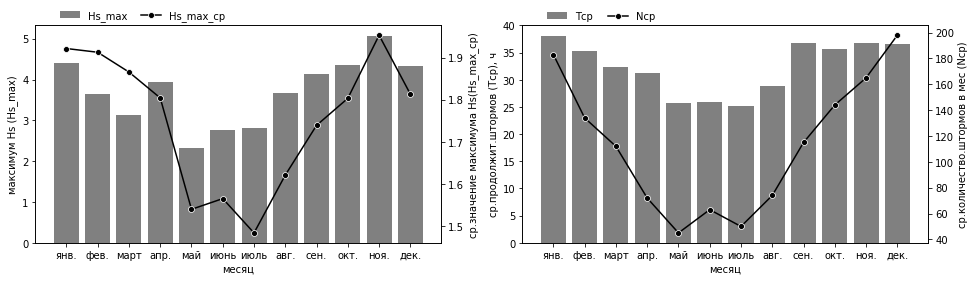

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
# первый график
ax1 = sns.barplot(x="month_name", y="Hsmax", data = storm_month, color='grey',label='Hs_max',ax=ax[0])
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="month_name", y="Hsmean",  data = storm_month, color='black', marker='o',label='Hs_max_ср')

ax1.set(xlabel ='месяц', ylabel = 'максимум Hs (Hs_max)')
ax2.set(ylabel = 'ср.значение максимума Hs(Hs_max_ср)')

ax2.grid(False)

ax1.legend(loc = (.05,1), frameon = False)
ax2.legend(loc = (.25,1), frameon = False)

# второй график
ax3 = sns.barplot(x="month_name", y="long", data = storm_month, color='grey',label='Tср',ax=ax[1])
ax4 = ax3.twinx()
ax4 = sns.lineplot(x="month_name", y="count",  data = storm_month, color='black', marker='o',label='Nср')

ax3.set(xlabel ='месяц', ylabel = 'ср.продолжит.штормов (Tср), ч')
ax4.set(ylabel = 'ср.количество.штормов в мес (Nср)')

ax3.grid(False)

ax3.legend(loc = (.05,1), frameon = False)
ax4.legend(loc = (.20,1), frameon = False)

plt.show()

In [8]:
fig.savefig('storm_charact_general.jpg')